In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

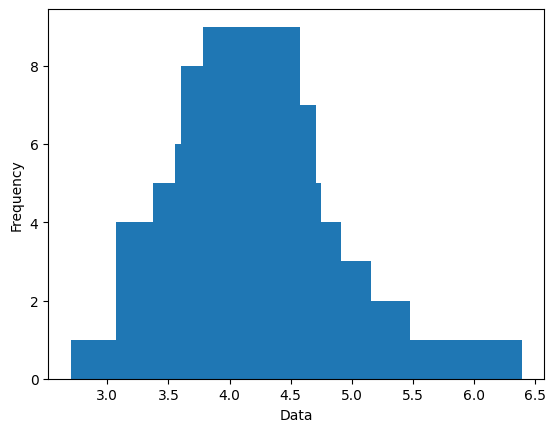

In [83]:
file_path = 'Normalized_table.xlsx'
df = pd.read_excel(file_path)

m_colum='Means'
means = df[m_colum]

freq_dict = {}
for x in means:
    if x not in freq_dict:
        freq_dict[x] = 1
    else:
        freq_dict[x] += 1

plt.bar(freq_dict.keys(), freq_dict.values())
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.show()

In [84]:
file_path = 'Normalized_table.xlsx'
df = pd.read_excel(file_path)
data = df['Means']
mean = np.mean(data) # 计算均值
std_dev = np.std(data) # 计算标准差

print('Mean:', mean)
print('Standard deviation:', std_dev)

Mean: 4.1954366197183095
Standard deviation: 0.40104865120185507


下面是检验Means这一列的数据是否符合正态分布，使用QQ图检验

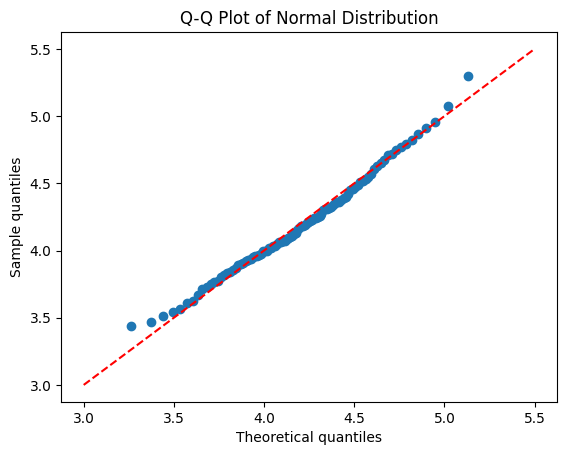

In [85]:
file_path = 'Normalized_table.xlsx'
df = pd.read_excel(file_path)
data = df['Means']
mean = np.mean(data) # 计算均值
std_dev = np.std(data) # 计算标准差

m_colum='Means'
means = df[m_colum]
quantiles_data = np.percentile(means, np.arange(0, 100, 1))
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1) / 100,loc=mean, scale=std_dev)

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([3, 5.5], [3, 5.5], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()

下面是检验Stddev这一列的数据是否符合正态分布，使用QQ图检验

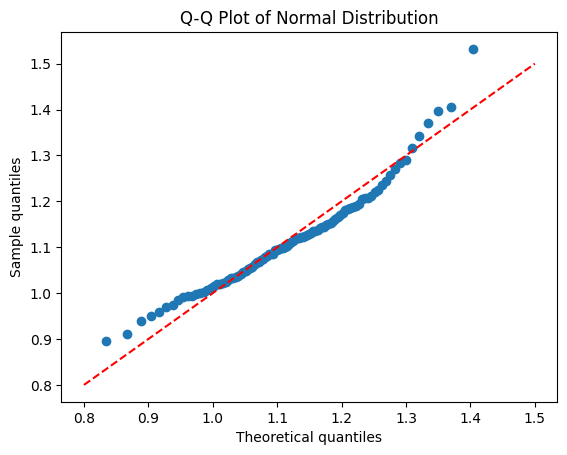

In [86]:
file_path = 'Normalized_table.xlsx'
df = pd.read_excel(file_path)
data = df['Stddev']
mean = np.mean(data) # 计算均值
std_dev = np.std(data) # 计算标准差

m_colum='Stddev'
means = df[m_colum]
quantiles_data = np.percentile(means, np.arange(0, 100, 1))
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1) / 100,loc=mean, scale=std_dev)

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([0.8, 1.5], [0.8, 1.5], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()

下面是检验Frequency这一列的数据是否符合正态分布，使用QQ图检验(失败)

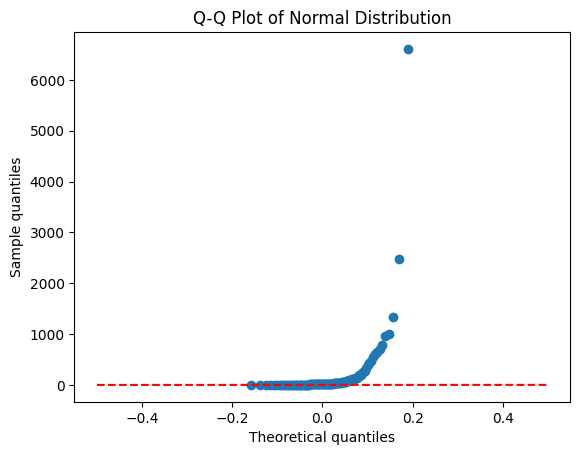

In [87]:
file_path = 'xk/excel/feature.xlsx'
df = pd.read_excel(file_path)
data = df['Frequency_scaled']

mean = np.mean(data) # 计算均值
std_dev = np.std(data) # 计算标准差
# print(mean,std_dev)
m_colum='Frequency'
means = df[m_colum]
quantiles_data = np.percentile(means, np.arange(0, 100, 1))
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1) / 100,loc=mean, scale=std_dev)

plt.scatter(quantiles_norm, quantiles_data)
plt.plot([-0.5, 0.5], [-0.5, 0.5], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()

means与Frequency_scaled的spearman相关系数检验

In [88]:
from scipy.stats import spearmanr

# 准备数据
file_path = 'xk/excel/feature.xlsx'
df = pd.read_excel(file_path)
data = df['Frequency_scaled']

file_path1 = 'Normalized_table.xlsx'
df1 = pd.read_excel(file_path1)
data1 = df1['Means']

# 计算Spearman相关系数和p-value
corr, p_value = spearmanr(data, data1)

# 输出结果
print("Spearman correlation coefficient: %.3f" % corr)
print("p-value: %.3f" % p_value)

Spearman correlation coefficient: -0.203
p-value: 0.000


Stddev与Frequency_scaled的spearman相关系数检验


In [89]:
from scipy.stats import spearmanr

# 准备数据
file_path = 'xk/excel/feature.xlsx'
df = pd.read_excel(file_path)
data = df['Frequency_scaled']

file_path1 = 'Normalized_table.xlsx'
df1 = pd.read_excel(file_path1)
data1 = df1['Stddev']

# 计算Spearman相关系数和p-value
corr, p_value = spearmanr(data, data1)

# 输出结果
print("Spearman correlation coefficient: %.3f" % corr)
print("p-value: %.3f" % p_value)

Spearman correlation coefficient: 0.124
p-value: 0.019


Replication number与Means的方差检验(存在显著差异)

In [90]:
from scipy.stats import ttest_ind
data = pd.read_excel('xk/excel/feature.xlsx')
data1 = pd.read_excel('Normalized_table.xlsx')
one_means = data1[data['Replication number'] == 1]['Means']
two_means = data1[data['Replication number'] == 2]['Means']
one_mean, two_mean = one_means.mean(), two_means.mean()
one_std, two_std = one_means.std(), two_means.std()
t, p = ttest_ind(one_means, two_means)
print('One means: mean=%.2f, std=%.2f' % (one_mean, one_std))
print('Two means: mean=%.2f, std=%.2f' % (two_mean, two_std))
print('t=%.10f, p=%.20f' % (t, p))

One means: mean=4.10, std=0.37
Two means: mean=4.42, std=0.38
t=-7.1462614144, p=0.00000000000519520662


Replication number与Stddev的方差检验（存在显著差异

In [91]:
from scipy.stats import ttest_ind
data = pd.read_excel('xk/excel/feature.xlsx')
data1 = pd.read_excel('Normalized_table.xlsx')
one_means = data1[data['Replication number'] == 1]['Stddev']
two_means = data1[data['Replication number'] == 2]['Stddev']
one_mean, two_mean = one_means.mean(), two_means.mean()
one_std, two_std = one_means.std(), two_means.std()
t, p = ttest_ind(one_means, two_means)
print('One Steddev: mean=%.2f, std=%.2f' % (one_mean, one_std))
print('Two Stddev: mean=%.2f, std=%.2f' % (two_mean, two_std))
print('t=%.10f, p=%.20f' % (t, p))

One Steddev: mean=1.13, std=0.12
Two Stddev: mean=1.10, std=0.12
t=1.9214431516, p=0.05548538304628135298


root与Means的方差检验(不存在显著差异)

In [92]:
from scipy.stats import ttest_ind
data = pd.read_excel('xk/excel/feature.xlsx')
data1 = pd.read_excel('Normalized_table.xlsx')
one_means = data1[data['root'] == 0]['Means']
two_means = data1[data['root'] == 1]['Means']
one_mean, two_mean = one_means.mean(), two_means.mean()
one_std, two_std = one_means.std(), two_means.std()
t, p = ttest_ind(one_means, two_means)
print('One Steddev: mean=%.2f, std=%.2f' % (one_mean, one_std))
print('Two Stddev: mean=%.2f, std=%.2f' % (two_mean, two_std))
print('t=%.10f, p=%.20f' % (t, p))

One Steddev: mean=4.18, std=0.42
Two Stddev: mean=4.21, std=0.38
t=-0.6633196444, p=0.50755879075395848865


root与Stddev的方差检验(不存在显著差异)

In [93]:
from scipy.stats import ttest_ind
data = pd.read_excel('xk/excel/feature.xlsx')
data1 = pd.read_excel('Normalized_table.xlsx')
one_means = data1[data['root'] == 0]['Stddev']
two_means = data1[data['root'] == 1]['Stddev']
one_mean, two_mean = one_means.mean(), two_means.mean()
one_std, two_std = one_means.std(), two_means.std()
t, p = ttest_ind(one_means, two_means)
print('One Steddev: mean=%.2f, std=%.2f' % (one_mean, one_std))
print('Two Stddev: mean=%.2f, std=%.2f' % (two_mean, two_std))
print('t=%.10f, p=%.20f' % (t, p))

One Steddev: mean=1.11, std=0.13
Two Stddev: mean=1.12, std=0.11
t=-0.7697523561, p=0.44196159135218626712


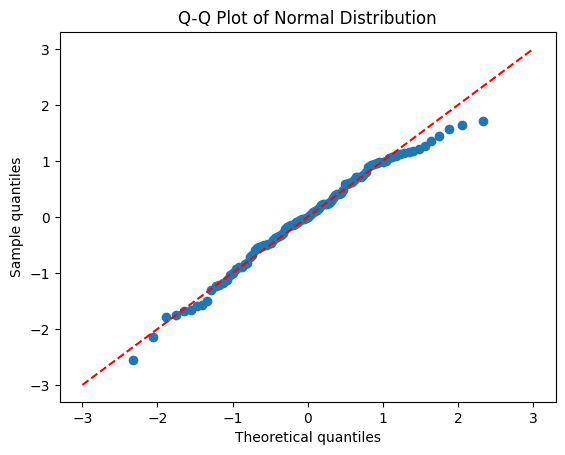

In [94]:
data = np.random.normal(loc=0, scale=1, size=100)

# 计算数据的分位数
quantiles_data = np.percentile(data, np.arange(0, 100, 1))

# 计算标准正态分布的分位数
quantiles_norm = stats.norm.ppf(np.arange(0, 100, 1) / 100)

# 绘制Q-Q图
plt.scatter(quantiles_norm, quantiles_data)
plt.plot([-3, 3], [-3, 3], 'r--')  # 绘制对角线
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Q-Q Plot of Normal Distribution')
plt.show()